In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
import imageio as imageio
from spectral import*
import spectral.io.envi as envi
from collections import Counter
from sklearn.metrics import classification_report

In [2]:
CR=np.array(pd.read_excel("CRwithWL.xlsx")) 
name_id=np.array(pd.read_excel("name_and_id_cr.xlsx"))
As_T= np.array(pd.read_excel("As.xlsx"))
wavelen=CR[:,0]
name=name_id[:,1]
As= As_T[:,1]

## normalize AS
normalized=np.zeros((33,1))
x=As
for i in range(0,33):
    normalized[i] = (x[i]-min(x))/(max(x)-min(x))

In [3]:
first_derivative=np.zeros((185,33))
# plt.figure(figsize=(10,5))
for i in range(0,33):
    y1=CR[:,i+1]
    first_derivative[:,i] = np.diff(y1,n=1)
fd1=np.zeros((185,34))
fd1[:,0]= wavelen[1:]
fd1[:,1:]=first_derivative

b1=[466,1269,1536,1656,1676,1986,2106]
# b1=[869,1046,1096,1136,1236,1266,1486,1556,1716,1786,2086,2146]
b1=np.array(b1)

FD_resample= np.zeros((len(b1), first_derivative.shape[1]))
a=[]
for i in range(0, len(b1)):
    for j in range (0,185):
        if fd1[j,0] == b1[i] :
            
            FD_resample[i,:]= fd1[j,1:]

In [4]:
from sklearn.model_selection import  train_test_split
X=FD_resample.T
y=normalized
X_train,X_test , y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state =11)

In [5]:
from pyGRNN import GRNN
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import  GridSearchCV

In [6]:
IGRNN = GRNN()
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.1)),
                'calibration' : ['warm_start']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=0
                          )
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test)
mse_IGRNN = MSE(y_test, y_pred)

mse_IGRNN

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.02571082]
Gradient search concluded. The optimum sigma is [1.76038982e-01 2.60000000e-02 3.18352885e-04 1.95909343e-01
 3.10220254e-01 4.87015825e-01 3.19485366e-03]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.02507468]
Gradient search concluded. The optimum sigma is [1.44483433e+00 2.50000000e-02 1.89373706e-03 1.58175111e+00
 2.24863866e+00 3.19976215e+00 1.99253075e-02]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.02438745]
Gradient search concluded. The optimum sigma is [0.54840988 0.024      0.2959511  0.4674379  0.82070697 1.38780935
 0.01235512]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.01790244]
Gradient search concluded. The optimum sigma is [0.00667143 0.018      0.00561227 0.02513084 0.02834267 0.00074689
 0.400575  ]
Executing warm start...
Warm start concluded. The optimum isotropic sigm

Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The optimum sigma is [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.5]
Gradient search concluded. The opt

Warm start concluded. The optimum isotropic sigma is [1.]
Gradient search concluded. The optimum sigma is [1. 1. 1. 1. 1. 1. 1.]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.]
Gradient search concluded. The optimum sigma is [1. 1. 1. 1. 1. 1. 1.]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.]
Gradient search concluded. The optimum sigma is [1. 1. 1. 1. 1. 1. 1.]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.1]
Gradient search concluded. The optimum sigma is [1.1 1.1 1.1 1.1 1.1 1.1 1.1]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.1]
Gradient search concluded. The optimum sigma is [1.1 1.1 1.1 1.1 1.1 1.1 1.1]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.1]
Gradient search concluded. The optimum sigma is [1.1 1.1 1.1 1.1 1.1 1.1 1.1]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.1]

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [1.6]
Gradient search concluded. The optimum sigma is [1.6 1.6 1.6 1.6 1.6 1.6 1.6]
Executing warm start...
Warm start

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.1]
Gradient search concluded. The optimum sigma is [2.1 2.1 2.1 2.1 2.1 2.1 2.1]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.2]
Gradient search concluded. The optimum sigma is [2.2 2.2 2.2 2.2 2.2 2.2 2.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.2]
Gradient search concluded. The optimum sigma is [2.2 2.2 2.2 2.2 2.2 2.2 2.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.2]
Gradient search concluded. The optimum sigma is [2.2 2.2 2.2 2.2 2.2 2.2 2.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.2]
Gradient search concluded. The optimum sigma is [2.2 2.2 2.2 2.2 2.2 2.2 2.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.2]
Gradient search concluded. The optimum sigma is [2.2 2.2 2.2 2.2 2.2 2.2 2.2]
Executing warm start...
Warm start

Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The optimum sigma is [2.7 2.7 2.7 2.7 2.7 2.7 2.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [2.7]
Gradient search concluded. The opt

Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.2]
Gradient search concluded. The optimum sigma is [3.2 3.2 3.2 3.2 3.2 3.2 3.2]
Executing warm start...
Warm start concluded. The optimum 

Warm start concluded. The optimum isotropic sigma is [3.7]
Gradient search concluded. The optimum sigma is [3.7 3.7 3.7 3.7 3.7 3.7 3.7]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.8]
Gradient search concluded. The optimum sigma is [3.8 3.8 3.8 3.8 3.8 3.8 3.8]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.8]
Gradient search concluded. The optimum sigma is [3.8 3.8 3.8 3.8 3.8 3.8 3.8]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.8]
Gradient search concluded. The optimum sigma is [3.8 3.8 3.8 3.8 3.8 3.8 3.8]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.8]
Gradient search concluded. The optimum sigma is [3.8 3.8 3.8 3.8 3.8 3.8 3.8]
Executing warm start...
Warm start concluded. The optimum isotropic sigma is [3.8]
Gradient search concluded. The optimum sigma is [3.8 3.8 3.8 3.8 3.8 3.8 3.8]
Executing warm start...
Warm start concluded. The optimum 

0.08500037904348447

In [7]:
img=open_image('C:/Users/kimmn/Desktop/uni-done/python programming/hyperion/smoothed_cr4.hdr')
img1=np.array(img.open_memmap())
img1[np.isnan(img1)] = 0

b=[467.519989,1265.560059,1537.920044,1659.0,1679.199951,1991.959961,2002.060059]

In [8]:
img17=np.zeros((702, 428, len(b)))
for i in range (0,161):
    for j in range (0,len(b)):
        if img.bands.centers[i] == b[j]:
#             print(b[j])
            img17[:,:,j]= img1[:,:428,i]
    
from tqdm import tqdm
def extract_pixels(dataset):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
        df = pd.concat([df], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]
    return df


dfimg17 = extract_pixels(img17)

dfimg1=np.array(dfimg17)

100%|██████████| 7/7 [00:00<00:00, 111.99it/s]


In [9]:
df = dfimg17[dfimg17 != 0]
dfimg2=np.array(df)
dfimg2[np.isnan(dfimg2)] =0

In [10]:
img_pred = best_model.predict(dfimg2)
np.unique(img_pred ,return_counts=True)

(array([0.07993761, 0.08089932, 0.08121061, ..., 0.10349352, 0.10363343,
        0.10402615]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.07993760875373677, 0.10402615144071149]
    G: [0.07993760875373677, 0.10402615144071149]
    B: [0.07993760875373677, 0.10402615144071149]

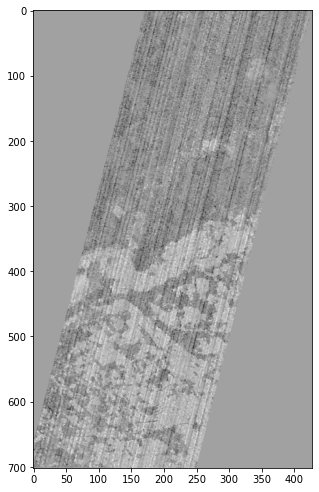

In [11]:
img_f=np.reshape(img_pred,(702, 428, 1))
imshow(img_f, figsize=(5,10))

In [12]:
np.unique(img_f , return_counts=True)

(array([0.07993761, 0.08089932, 0.08121061, ..., 0.10349352, 0.10363343,
        0.10402615]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [13]:
img_pred1 = best_model.predict(dfimg2)
img_f2=np.reshape(img_pred1,(702, 428, 1))


In [14]:
img_f2[0,0,0]

0.09512459703521106

In [15]:
pd.DataFrame(img_f2[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,...,0.092096,0.091825,0.092189,0.093275,0.095677,0.096534,0.095826,0.095275,0.095161,0.094790
1,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,...,0.089761,0.091886,0.093724,0.094674,0.095824,0.096553,0.096220,0.095101,0.094072,0.095125
2,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,...,0.091572,0.093905,0.093229,0.094341,0.095136,0.095436,0.095564,0.094103,0.092557,0.095125
3,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,...,0.093333,0.094621,0.094220,0.093628,0.093708,0.095153,0.095253,0.094510,0.094464,0.095125
4,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,...,0.090953,0.093027,0.094229,0.096016,0.095043,0.095410,0.095547,0.094186,0.095208,0.095125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.095125,0.092143,0.091043,0.091990,0.093002,0.092588,0.093481,0.091943,0.091749,0.091286,...,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125
698,0.095125,0.091966,0.091480,0.092999,0.092475,0.093017,0.093031,0.095534,0.091789,0.093415,...,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125
699,0.095125,0.093457,0.092578,0.093192,0.091477,0.093204,0.094856,0.096170,0.094215,0.093031,...,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125
700,0.095125,0.092280,0.090780,0.091624,0.091407,0.092174,0.090328,0.091932,0.091516,0.091901,...,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125,0.095125


In [16]:
im2=img_f2
for i in range (0,702):
    for j in range(0,428):
        if img_f2[i,j] == 0.09512459703521106  : 
            im2[i,j] = 0.078

In [17]:
np.unique(im2)

array([0.078     , 0.07993761, 0.08089932, ..., 0.10349352, 0.10363343,
       0.10402615])

In [18]:
for i in range (0,702):
    for j in range(0,428):
        im2[i,j] = (im2[i,j]*(max(x)-min(x)))+min(x)

In [19]:
np.unique(im2)

array([11.07622212, 11.18463365, 11.23844253, ..., 12.50261502,
       12.51044339, 12.53241643])

Text(0.5, 1.0, 'Arsenic in soil')

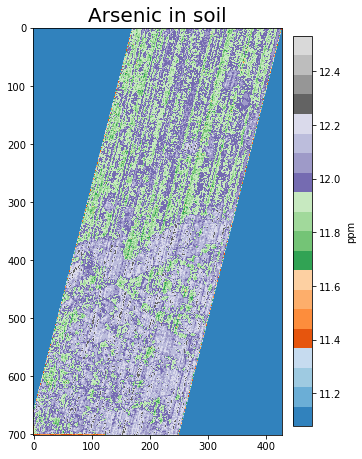

In [20]:
plt.figure(figsize=(5,10))
plt.imshow(im2 , cmap='tab20c')
plt.colorbar(fraction=0.07, pad=0.04, label="ppm")
plt.title('Arsenic in soil', fontsize=20)

In [21]:

# plt.figure(figsize=(10,20))
# plt.imshow(im2 ,cmap='tab20c')
# plt.scatter(shape.x,shape.y)
# plt.imshow(shape)
# plt.colorbar(fraction=0.07, pad=0.04)
# plt.title('Arsenic in soil', fontsize=20)

In [22]:
import fiona
shapef= fiona.open("C:/Users/kimmn/Desktop/uni-done/arc_epi/patients_hyperion_.shp")

In [23]:
import shapefile

shape = shapefile.Reader("C:/Users/kimmn/Desktop/uni-done/arc_epi/patients_hyperion_.shp")

<AxesSubplot:>

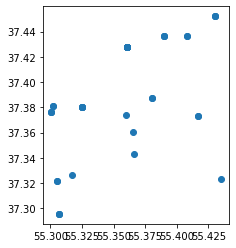

In [24]:
import geopandas as gpd
shape=gpd.read_file("C:/Users/kimmn/Desktop/uni-done/arc_epi/patients_hyperion_.shp")
shape.plot()

In [25]:
shape

,PID,Age,WHR,APP,BP,Smoking,TeaTempDes,SES,AgeC,BMIC,Gender,Area,OpiateEver,x,y,geometry
0,3734.0,71.0,0.804598,11.666667,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,37.376306,55.300778,POINT (55.30078 37.37631)
1,3761.0,51.0,1.000000,30.000000,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,37.376306,55.300778,POINT (55.30078 37.37631)
2,3821.0,56.0,0.804878,9.818182,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,37.376306,55.300778,POINT (55.30078 37.37631)
3,3836.0,55.0,0.970588,20.000000,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,37.381389,55.301639,POINT (55.30164 37.38139)
4,3867.0,66.0,1.019048,17.142857,0.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,37.381389,55.301639,POINT (55.30164 37.38139)
5,9979.0,66.0,0.970000,18.000000,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,37.436222,55.408278,POINT (55.40828 37.43622)
6,10022.0,47.0,0.990385,8.000000,1.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,37.436222,55.408278,POINT (55.40828 37.43622)
7,10281.0,55.0,0.876404,10.400000,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,37.452167,55.430306,POINT (55.43031 37.45217)
8,10325.0,61.0,1.113402,12.000000,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,37.452167,55.430306,POINT (55.43031 37.45217)
9,10429.0,66.0,0.966667,10.000000,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,37.452167,55.430306,POINT (55.43031 37.45217)


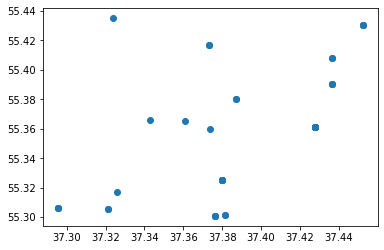

In [26]:
x=np.array(shape.x)
y=np.array(shape.y)
plt.scatter(x,y)

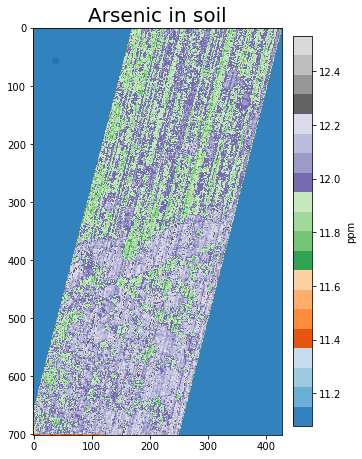

In [27]:
plt.figure(figsize=(5,10))
plt.imshow(im2 , cmap='tab20c')
plt.colorbar(fraction=0.07, pad=0.04, label="ppm")
plt.title('Arsenic in soil', fontsize=20)
plt.scatter(x,y )
